<a href="https://colab.research.google.com/github/Anant-mishra1729/Machine-Learning-Notebooks/blob/main/Object_detection/Simple_object_detection_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

In [ ]:
model = hub.load(module_handle)

Some models in the Tensorflow hub can be used for different tasks. So each model's documentation should show what signature to use when running the model.

If you want to see if a model has more than one signature then you can do something like print(hub.load(module_handle).signatures.keys()). In your case, the models you will be using only have the default signature so you don't have to worry about other types.

In [ ]:
model.signatures.keys()

KeysView(_SignatureMap({'default': <ConcreteFunction pruned(images) at 0x7DB4D16BB6A0>}))

In [ ]:
# Chossing default signature
# Default signature accepts image tensors and outputs dictionary about the objects detected
detector = model.signatures['default']

In [ ]:
# Downloading image
!wget https://upload.wikimedia.org/wikipedia/commons/6/60/A_random_street_in_the_UK.jpg

--2023-10-19 05:29:49--  https://upload.wikimedia.org/wikipedia/commons/6/60/A_random_street_in_the_UK.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2418792 (2.3M) [image/jpeg]
Saving to: ‘A_random_street_in_the_UK.jpg’

A_random_street_in_ 100%[===================>]   2.31M  15.1MB/s    in 0.2s    

2023-10-19 05:29:49 (15.1 MB/s) - ‘A_random_street_in_the_UK.jpg’ saved [2418792/2418792]



(2322, 4128, 3)


True

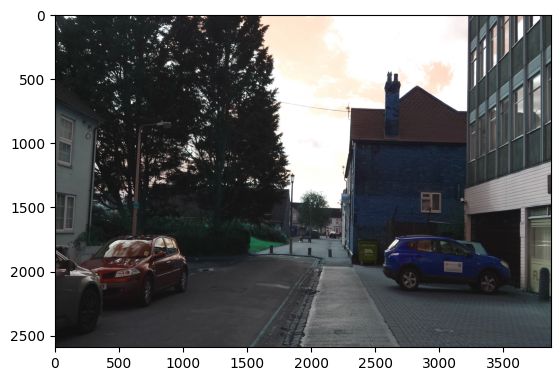

In [ ]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('A_random_street_in_the_UK.jpg')
print(image.shape)

# Resizing image
image = cv2.resize(image, (3872, 2592), interpolation = cv2.INTER_LINEAR)
plt.imshow(image)

# Saving resized image
cv2.imwrite("image.jpg",image)

## Running detector

In [ ]:
converted_image = tf.image.convert_image_dtype(image, tf.float32)[tf.newaxis, ...]
result = detector(converted_image)

In [ ]:
result

{'detection_boxes': <tf.Tensor: shape=(100, 4), dtype=float32, numpy=
 array([[6.58324778e-01, 6.60807610e-01, 8.41479838e-01, 9.10236537e-01],
        [6.54677987e-01, 4.17154953e-02, 8.81086051e-01, 2.70695150e-01],
        [1.90634876e-01, 5.76092243e-01, 7.21995950e-01, 8.40835154e-01],
        [7.03883171e-01, 1.52464851e-03, 9.63342309e-01, 9.89221409e-02],
        [7.60749042e-01, 6.92825437e-01, 8.32286000e-01, 7.35639274e-01],
        [7.65017986e-01, 8.47312570e-01, 8.44003856e-01, 8.97298038e-01],
        [0.00000000e+00, 8.18647027e-01, 8.47263277e-01, 9.96385872e-01],
        [5.31569064e-01, 7.33686864e-01, 5.99542379e-01, 7.79894471e-01],
        [1.81336701e-01, 0.00000000e+00, 7.36767590e-01, 9.82261449e-02],
        [7.64109731e-01, 2.38097027e-01, 8.38711679e-01, 2.65426993e-01],
        [7.86400974e-01, 1.62859559e-01, 8.80311787e-01, 1.95812419e-01],
        [1.92278046e-02, 2.00692430e-01, 6.87040925e-01, 4.76632655e-01],
        [3.02548766e-01, 2.06926255e-03, 4

In [ ]:
result = {key:value.numpy() for key,value in result.items()}
result

{'detection_boxes': array([[6.58324778e-01, 6.60807610e-01, 8.41479838e-01, 9.10236537e-01],
        [6.54677987e-01, 4.17154953e-02, 8.81086051e-01, 2.70695150e-01],
        [1.90634876e-01, 5.76092243e-01, 7.21995950e-01, 8.40835154e-01],
        [7.03883171e-01, 1.52464851e-03, 9.63342309e-01, 9.89221409e-02],
        [7.60749042e-01, 6.92825437e-01, 8.32286000e-01, 7.35639274e-01],
        [7.65017986e-01, 8.47312570e-01, 8.44003856e-01, 8.97298038e-01],
        [0.00000000e+00, 8.18647027e-01, 8.47263277e-01, 9.96385872e-01],
        [5.31569064e-01, 7.33686864e-01, 5.99542379e-01, 7.79894471e-01],
        [1.81336701e-01, 0.00000000e+00, 7.36767590e-01, 9.82261449e-02],
        [7.64109731e-01, 2.38097027e-01, 8.38711679e-01, 2.65426993e-01],
        [7.86400974e-01, 1.62859559e-01, 8.80311787e-01, 1.95812419e-01],
        [1.92278046e-02, 2.00692430e-01, 6.87040925e-01, 4.76632655e-01],
        [3.02548766e-01, 2.06926255e-03, 4.62765098e-01, 3.98172587e-02],
        [8.21707606

In [ ]:
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps
def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):

    """
    Adds a bounding box to an image.

    Args:
        image -- the image object
        ymin -- bounding box coordinate
        xmin -- bounding box coordinate
        ymax -- bounding box coordinate
        xmax -- bounding box coordinate
        color -- color for the bounding box edges
        font -- font for class label
        thickness -- edge thickness of the bounding box
        display_str_list -- class labels for each object detected


    Returns:
        No return.  The function modifies the `image` argument
                    that gets passed into this function

    """
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size

    # scale the bounding box coordinates to the height and width of the image
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

    # define the four edges of the detection box
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

    # If the total height of the display strings added to the top of the bounding
    # box exceeds the top of the image, stack the strings below the bounding box
    # instead of above.
    display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
    # Each display_str has a top and bottom margin of 0.05x.
    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

    if top > total_display_str_height:
        text_bottom = top
    else:
        text_bottom = top + total_display_str_height

    # Reverse list and print from bottom to top.
    for display_str in display_str_list[::-1]:
        text_width, text_height = font.getsize(display_str)
        margin = np.ceil(0.05 * text_height)
        draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                        (left + text_width, text_bottom)],
                       fill=color)
        draw.text((left + margin, text_bottom - text_height - margin),
                  display_str,
                  fill="black",
                  font=font)
        text_bottom -= text_height - 2 * margin


def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
    """
    Overlay labeled boxes on an image with formatted scores and label names.

    Args:
        image -- the image as a numpy array
        boxes -- list of detection boxes
        class_names -- list of classes for each detected object
        scores -- numbers showing the model's confidence in detecting that object
        max_boxes -- maximum detection boxes to overlay on the image (default is 10)
        min_score -- minimum score required to display a bounding box

    Returns:
        image -- the image after detection boxes and classes are overlaid on the original image.
    """
    colors = list(ImageColor.colormap.values())

    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              40)
    except IOError:
        print("Font not found, using default font.")
        font = ImageFont.load_default()

    for i in range(min(boxes.shape[0], max_boxes)):

        # only display detection boxes that have the minimum score or higher
        if scores[i] >= min_score:
            ymin, xmin, ymax, xmax = tuple(boxes[i])
            display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                         int(100 * scores[i]))
            color = colors[hash(class_names[i]) % len(colors)]
            image_pil = Image.fromarray(np.uint8(image)).convert("RGB")

            # draw one bounding box and overlay the class labels onto the image
            draw_bounding_box_on_image(image_pil,
                                       ymin,
                                       xmin,
                                       ymax,
                                       xmax,
                                       color,
                                       font,
                                       display_str_list=[display_str])
            np.copyto(image, np.array(image_pil))

    return image

In [ ]:
def display_image(image):
    """
    Displays an image inside the notebook.
    This is used by download_and_resize_image()
    """
    fig = plt.figure(figsize=(20, 15))
    plt.grid(False)
    plt.imshow(image)

<ipython-input-29-5c048fb2351d>:53: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
<ipython-input-29-5c048fb2351d>:64: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  text_width, text_height = font.getsize(display_str)


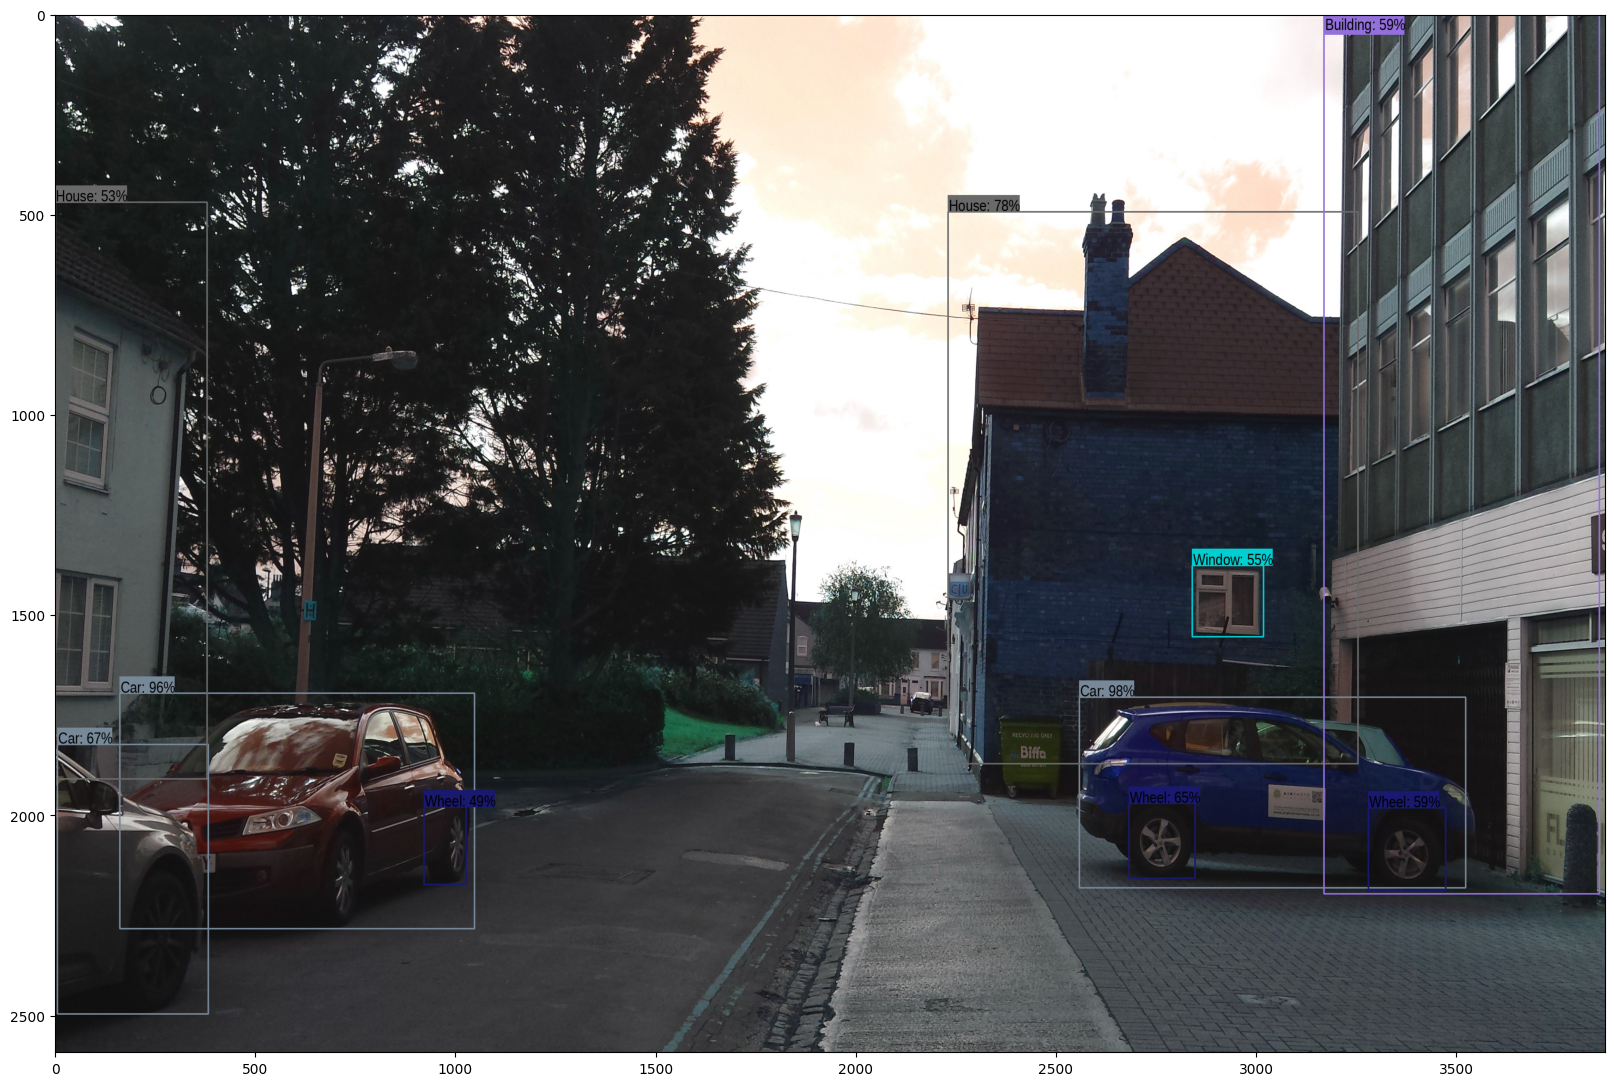

In [ ]:
# draw predicted boxes over the image
image_with_boxes = draw_boxes(
  image, result["detection_boxes"],
  result["detection_class_entities"], result["detection_scores"])

# display the image
display_image(image_with_boxes)